# Simple Linear Regression
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

Predict delivery time using sorting time 

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Delivery_Data=pd.read_csv("C:\\ExcelR\\Assignments\\Simple Linear\\Data\\delivery_time.csv")
Delivery_Data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Understanding

In [3]:
Delivery_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Correlation Analysis

In [4]:
Delivery_Data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#### The features are positively corelated with correlation factor of 0.83

## Performimg Assumption Checks

### 1.Linearity Test

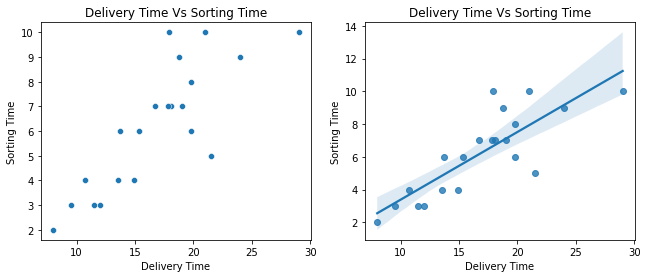

In [5]:
fig,axes=plt.subplots(1,2)
plt.subplots_adjust(right=1.5)

sns.scatterplot(x="Delivery Time",y="Sorting Time",data=Delivery_Data,ax=axes[0])
axes[0].set_title("Delivery Time Vs Sorting Time")

sns.regplot(x="Delivery Time",y="Sorting Time",data=Delivery_Data,ax=axes[1])
axes[1].set_title("Delivery Time Vs Sorting Time")

plt.show()

#### Linearity Test failed.

## 2. Normality Test

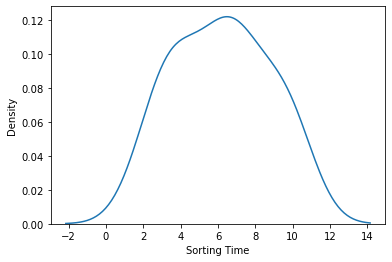

In [6]:
sns.distplot(a=Delivery_Data['Sorting Time'],hist=False)
plt.show()

#### Normality Test Failed.

#### 3. Multicollinearity is not applicable
#### 4. No autoRegression

## Model Building

In [7]:
import statsmodels.formula.api as smf

In [8]:
Delivery_Data.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [9]:
Delivery_Data.columns=['Delivery_Time', 'Sorting_Time']

In [10]:
Linear_Model=smf.ols(formula="Delivery_Time~Sorting_Time", data=Delivery_Data).fit()

Linear_Model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

## Model Testing

In [11]:
Test=pd.DataFrame(data={'Sorting_Time':[5,10,15]})
Test

,Sorting_Time
0,5
1,10
2,15


In [12]:
Linear_Model.predict(Test)

0    14.827833
1    23.072933
2    31.318032
dtype: float64

## Model Evaluation

In [13]:
Evaluation=Delivery_Data
Evaluation["Delivert_Time_Pred"]=Linear_Model.predict(Delivery_Data)
Evaluation["Error"]=Evaluation["Delivery_Time"]-Evaluation["Delivert_Time_Pred"]
Evaluation.head()

,Delivery_Time,Sorting_Time,Delivert_Time_Pred,Error
0,21.00,10,23.072933,-2.072933
1,13.50,4,13.178814,0.321186
2,19.75,6,16.476853,3.273147
3,24.00,9,21.423913,2.576087
4,29.00,10,23.072933,5.927067


### Homoscedasticity Check

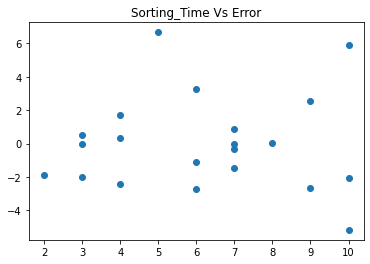

In [14]:
plt.scatter(x=Evaluation["Sorting_Time"],y=Evaluation["Error"])
plt.title("Sorting_Time Vs Error")
plt.show()

#### Homoscedasticity Check failed

### Residual Mean Across the fitted Line

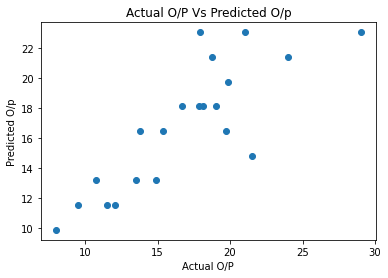

In [15]:
plt.scatter(x=Evaluation["Delivery_Time"],y=Evaluation["Delivert_Time_Pred"])
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

#### Variations between the values are high.

## Model Optimization

In [16]:
import numpy as np

In [17]:
print("R2 Score before Transformation    :",Linear_Model.rsquared)
Linear_Model_Log=smf.ols(formula="Delivery_Time~np.log(Sorting_Time)", data=Delivery_Data).fit()
print("R2 score after Log Transformation :",Linear_Model_Log.rsquared)
Linear_Model_sqrt=smf.ols(formula="Delivery_Time~np.sqrt(Sorting_Time)", data=Delivery_Data).fit()
print("R2 score after sqrt Transformation:",Linear_Model_sqrt.rsquared)
Linear_Model_cbrt=smf.ols(formula="Delivery_Time~np.cbrt(Sorting_Time)", data=Delivery_Data).fit()
print("R2 score after cbrt Transformation:",Linear_Model_cbrt.rsquared)

R2 Score before Transformation    : 0.6822714748417231
R2 score after Log Transformation : 0.6954434611324223
R2 score after sqrt Transformation: 0.6958062276308671
R2 score after cbrt Transformation: 0.6974182292354246


In [18]:
Linear_Model_Mixed=smf.ols(formula="Delivery_Time~Sorting_Time+np.cbrt(Sorting_Time)", data=Delivery_Data).fit()
print("R2 score after adding transformed data as new feature:",Linear_Model_Mixed.rsquared)

R2 score after adding transformed data as new feature: 0.6974782613477317


### Model Selection
#### R2 score for model using transformed Data(Cube Root) is high compared to other models.Hence the model is choosen for deployment.

### Model Deployment

In [19]:
from pickle import dump,load
dump(Linear_Model_cbrt,open('Intel_On_Deliverytime.pkl','wb'))

In [20]:
Loaded_Int=load(open('Intel_On_Deliverytime.pkl','rb'))
Loaded_Int.predict(Test)

0    15.382474
1    22.390381
2    27.306264
dtype: float64